In [1]:
import pandas as pd
import numpy as np
import random as random

# plotly standard imports
import plotly.graph_objs as go
import plotly.plotly as py



In [2]:
# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff


# Data input

In [3]:
input_df=pd.read_csv("train.csv", sep=",")
X=input_df.drop("revenue", axis=1) # drop labels for training set
y=input_df["revenue"]

In [4]:
type(y)

pandas.core.series.Series

In [5]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
X_train.reset_index(inplace=True);
X_test.reset_index(inplace=True);

In [24]:
df=pd.concat([X_train, y_train], axis=1, sort=False)

In [25]:
df.head()

,index,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,611.0,612.0,NaN,8575000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,tt4016934,ko,아가씨,"1930s Korea, in the period of Japanese occupat...",...,6/1/16,145.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,Never did they expect to get into a controvers...,The Handmaiden,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'cast_id': 3, 'character': 'Lady Hideko', 'c...","[{'credit_id': '54056d0b0e0a2658f100c167', 'de...",NaN
1,530.0,531.0,"[{'id': 366444, 'name': 'Demetrius Filmreihe',...",4100000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0046247,en,The Robe,Marcellus is a tribune in the time of Christ. ...,...,9/16/53,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The first motion picture in CinemaScope--the m...,The Robe,"[{'id': 3571, 'name': 'crucifixion'}, {'id': 5...","[{'cast_id': 1, 'character': 'Marcellus Gallio...","[{'credit_id': '52fe4603c3a368484e07be21', 'de...",95149435.0
2,2787.0,2788.0,NaN,80000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1037705,en,The Book of Eli,"A post-apocalyptic tale, in which a lone man f...",...,1/14/10,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some will kill to have it. He will kill to pro...,The Book of Eli,"[{'id': 3096, 'name': 'book'}, {'id': 4458, 'n...","[{'cast_id': 1, 'character': 'Eli', 'credit_id...","[{'credit_id': '52fe43e9c3a368484e0058ad', 'de...",13092000.0
3,49.0,50.0,"[{'id': 115570, 'name': 'Star Trek: The Next G...",38000000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,tt0111280,en,Star Trek: Generations,Captain Jean-Luc Picard and the crew of the En...,...,11/17/94,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Boldly go.,Star Trek: Generations,"[{'id': 10988, 'name': 'based on tv series'}, ...","[{'cast_id': 5, 'character': 'Captain Jean-Luc...","[{'credit_id': '52fe4225c3a36847f80076c3', 'de...",16000000.0
4,1883.0,1884.0,"[{'id': 454520, 'name': 'Captain Harlock Colle...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",NaN,tt2668134,ja,キャプテンハーロック,Space Pirate Captain Harlock and his fearless ...,...,9/7/13,115.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Space Pirate Captain Harlock,NaN,"[{'cast_id': 1, 'character': 'Captain Harlock ...","[{'credit_id': '52fe4cac9251416c910fc711', 'de...",3923970.0


In [26]:
y_test=y_test.values
y_train=y_train.values

# Removing Nulls and Data exploration

In [27]:
X_train.isna().sum()

index                       0
id                          0
belongs_to_collection    1675
budget                      0
genres                      5
homepage                 1427
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      122
production_countries       41
release_date                0
runtime                     2
spoken_languages           15
status                      0
tagline                   441
title                       0
Keywords                  194
cast                        9
crew                       12
dtype: int64

In [28]:
from sklearn.base import TransformerMixin

In [29]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


In [30]:
X_train_t=DataFrameImputer().fit_transform(X_train)

In [31]:
df_t=DataFrameImputer().fit_transform(df)

In [32]:
X_train_t.isna().sum()

index                    0
id                       0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
Keywords                 0
cast                     0
crew                     0
dtype: int64

In [33]:
#Comparing correlatons between Consumption_per_NIA/log_NIA/Property Type 


figure = ff.create_scatterplotmatrix(
    df_t[['budget', 'popularity',"runtime","revenue"]],
    height=1000,
    width=1000,
    diag='histogram',
    title="Data Exploration")
iplot(figure)

In [34]:
corrs = df[["revenue","popularity","runtime","budget"]].corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)

iplot(figure)

# Feature engineering

In [35]:
import ast


def cat_list(line):
    c_list=[]
    line_eval=ast.literal_eval(line)
    for d in line_eval:
        c_list.append(d["name"])
    return(c_list)

In [36]:
def get_left(string):
    try:
        if len(string)==8:
            return(int(string[:2]))
        else:
            return(int(string[:1]))
    except: return 0

In [37]:

def get_year(string):
    try:
        if int(string[-2:])< 20:
            return int(string[-2:])+2000
        else:
            return int(string[-2:])+1900
    except:
        return 0

In [38]:
X_train_t.head()

,index,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,611,612,"[{'id': 645, 'name': 'James Bond Collection', ...",8575000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://www.transformersmovie.com/,tt4016934,ko,아가씨,"1930s Korea, in the period of Japanese occupat...",...,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",6/1/16,145.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,Never did they expect to get into a controvers...,The Handmaiden,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'cast_id': 3, 'character': 'Lady Hideko', 'c...","[{'credit_id': '54056d0b0e0a2658f100c167', 'de..."
1,530,531,"[{'id': 366444, 'name': 'Demetrius Filmreihe',...",4100000,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0046247,en,The Robe,Marcellus is a tribune in the time of Christ. ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",9/16/53,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The first motion picture in CinemaScope--the m...,The Robe,"[{'id': 3571, 'name': 'crucifixion'}, {'id': 5...","[{'cast_id': 1, 'character': 'Marcellus Gallio...","[{'credit_id': '52fe4603c3a368484e07be21', 'de..."
2,2787,2788,"[{'id': 645, 'name': 'James Bond Collection', ...",80000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",http://www.transformersmovie.com/,tt1037705,en,The Book of Eli,"A post-apocalyptic tale, in which a lone man f...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1/14/10,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some will kill to have it. He will kill to pro...,The Book of Eli,"[{'id': 3096, 'name': 'book'}, {'id': 4458, 'n...","[{'cast_id': 1, 'character': 'Eli', 'credit_id...","[{'credit_id': '52fe43e9c3a368484e0058ad', 'de..."
3,49,50,"[{'id': 115570, 'name': 'Star Trek: The Next G...",38000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.transformersmovie.com/,tt0111280,en,Star Trek: Generations,Captain Jean-Luc Picard and the crew of the En...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",11/17/94,118.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Boldly go.,Star Trek: Generations,"[{'id': 10988, 'name': 'based on tv series'}, ...","[{'cast_id': 5, 'character': 'Captain Jean-Luc...","[{'credit_id': '52fe4225c3a36847f80076c3', 'de..."
4,1883,1884,"[{'id': 454520, 'name': 'Captain Harlock Colle...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://www.transformersmovie.com/,tt2668134,ja,キャプテンハーロック,Space Pirate Captain Harlock and his fearless ...,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",9/7/13,115.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,It will take your breath away. All of it.,Space Pirate Captain Harlock,"[{'id': 10183, 'name': 'independent film'}]","[{'cast_id': 1, 'character': 'Captain Harlock ...","[{'credit_id': '52fe4cac9251416c910fc711', 'de..."


In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

In [40]:

class DateAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """

        init
        """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
       
        year=X['release_date'].apply(lambda x: get_year(x))
        df_year=pd.DataFrame(year.values,columns=["year"])
        month=X['release_date'].apply(lambda x:get_left(x))
        df_month=pd.DataFrame(month.values,columns=["month"])
       
        processed_X=pd.concat([X, df_year, df_month], axis=1, sort=False)
      
        return processed_X

In [235]:
from sklearn.preprocessing import StandardScaler

In [256]:
sts=StandardScaler()
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        """

        init
        """
    def fit(self, X, y=None):
        self.fit = sts.fit(X[["budget"]])
        return self
    
    def transform(self, X, y=None):
       
        X["budget"]=self.transform(X["budget"])
      
        return X

In [41]:
attr_adder=DateAttributesAdder()
X_train_t2=attr_adder.fit_transform(X_train_t)

In [42]:
X_train_t2.columns

Index(['index', 'id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'year',
       'month'],
      dtype='object')

# Unpacking categories and spoken languages

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)

'''
class CatAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X["budget"]=np.log(X["budget"]+1)
        
        genres_list=X["genres"].apply(lambda x: cat_list(x))
        genres_label_data=mlb.fit_transform(genres_list)
        genres_labelClasses = mlb.classes_
        genresLabels=pd.DataFrame(genres_label_data, columns=genres_labelClasses)
        
        language_list=X['spoken_languages'].apply(lambda x: cat_list(x))
        language_label_data=mlb.fit_transform(language_list)
        language_labelClasses =  "spoken_lan_" + mlb.classes_
        languageLabels=pd.DataFrame(language_label_data, columns=language_labelClasses)
        languageLabels=languageLabels[[ 'spoken_lan_Deutsch', 'spoken_lan_English', 'spoken_lan_Español', 'spoken_lan_Français', 'spoken_lan_Italiano', 'spoken_lan_Pусский']]
        
        
        prod_country=X['production_countries'].apply(lambda x: cat_list(x))
        prod_country_label_data=mlb.fit_transform(prod_country)
        prod_country_labelClasses =  "prod_country_" + mlb.classes_
        prod_countryLabels=pd.DataFrame(prod_country_label_data, columns=prod_country_labelClasses)
        prod_countryLabels=prod_countryLabels[prod_countryLabels.columns[prod_countryLabels.sum()>len(X)/20]]
        
        
        prod_company=X['production_companies'].apply(lambda x: cat_list(x))
        prod_company_label_data=mlb.fit_transform(prod_company)
        prod_company_labelClasses = mlb.classes_
        prod_companyLabels=pd.DataFrame(prod_company_label_data, columns=prod_company_labelClasses)
        prod_companyLabels=prod_companyLabels[prod_companyLabels.columns[prod_companyLabels.sum()>len(X)/50]]
        
        org_lan_cat_1hot = cat_encoder.fit_transform(X[["original_language"]])
        df_org_lan=pd.DataFrame(org_lan_cat_1hot, columns=cat_encoder.categories_[0])
        df_org_lan=df_org_lan[df_org_lan.columns[df_org_lan.sum()>len(X)/100]]
        
        processed_X=pd.concat([X, genresLabels,languageLabels, prod_countryLabels, df_org_lan, prod_companyLabels], axis=1, sort=False)
        
         
        processed_X=processed_X[['budget',
                                   'popularity',
                                      'runtime',
                                       'Action',
                                    'Adventure',
                                    'Animation',
                                       'Comedy',
                                        'Crime',
                                  'Documentary',
                                        'Drama',
                                       'Family',
                                      'Fantasy',
                                      'Foreign',
                                      'History',
                                       'Horror',
                                        'Music',
                                      'Mystery',
                                      'Romance',
                              'Science Fiction',
                                     'Thriller',
                                          'War',
                                      'Western',
                           'spoken_lan_Deutsch',
                           'spoken_lan_English',
                           'spoken_lan_Español',
                          'spoken_lan_Français',
                          'spoken_lan_Italiano',
                           'spoken_lan_Pусский',
                          'prod_country_France',
                         'prod_country_Germany',
                  'prod_country_United Kingdom',
        'prod_country_United States of America',
                                        'en',
                                        'es',
                                        'fr',
                                        'hi',
                            'Columbia Pictures',
                    'Metro-Goldwyn-Mayer (MGM)',
                              'New Line Cinema',
                           'Paramount Pictures',
                          'Touchstone Pictures',
       'Twentieth Century Fox Film Corporation',
                           'Universal Pictures',
                                 'Warner Bros.', 
            "year", 
            "month"]]
        
        X["decade"]=(X["year"]-X["year"]%10)
        
        
        decade_cat_1hot = cat_encoder.fit_transform(X[["decade"]])
        df_year=pd.DataFrame(decade_cat_1hot, columns=cat_encoder.categories_[0])
        
        month_cat_1hot = cat_encoder.fit_transform(X[["month"]])
        df_month=pd.DataFrame(month_cat_1hot, columns=list(cat_encoder.categories_[0]))
        df_month.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Nov", 11:"Oct", 12:"Dec"}, inplace = True)

        processed_X["year_budget_ratio"]= processed_X["budget"]/((processed_X["year"])**2)
        
        processed_X=pd.concat([processed_X, df_month], axis=1, sort=False)
        
        processed_X=processed_X.drop(columns=["month"])
        return(processed_X)
        
''''''        
     

In [441]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)


class CatAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.columns=X.columns.droplevel()
        
        genres_list=X["genres"].apply(lambda x: cat_list(x))
        genres_label_data=mlb.fit_transform(genres_list)
        genres_labelClasses = mlb.classes_
        genresLabels=pd.DataFrame(genres_label_data, columns=genres_labelClasses)
        
        language_list=X['spoken_languages'].apply(lambda x: cat_list(x))
        language_label_data=mlb.fit_transform(language_list)
        language_labelClasses =  "spoken_lan_" + mlb.classes_
        languageLabels=pd.DataFrame(language_label_data, columns=language_labelClasses)
        languageLabels=languageLabels[[ 'spoken_lan_Deutsch', 'spoken_lan_English', 'spoken_lan_Español', 'spoken_lan_Français', 'spoken_lan_Italiano', 'spoken_lan_Pусский']]
        
        
        prod_country=X['production_countries'].apply(lambda x: cat_list(x))
        prod_country_label_data=mlb.fit_transform(prod_country)
        prod_country_labelClasses =  "prod_country_" + mlb.classes_
        prod_countryLabels=pd.DataFrame(prod_country_label_data, columns=prod_country_labelClasses)
        prod_countryLabels=prod_countryLabels[prod_countryLabels.columns[prod_countryLabels.sum()>len(X)/20]]
        
        
        prod_company=X['production_companies'].apply(lambda x: cat_list(x))
        prod_company_label_data=mlb.fit_transform(prod_company)
        prod_company_labelClasses = mlb.classes_
        prod_companyLabels=pd.DataFrame(prod_company_label_data, columns=prod_company_labelClasses)
        prod_companyLabels=prod_companyLabels[prod_companyLabels.columns[prod_companyLabels.sum()>len(X)/50]]
        
        org_lan_cat_1hot = cat_encoder.fit_transform(X[["original_language"]])
        df_org_lan=pd.DataFrame(org_lan_cat_1hot, columns=cat_encoder.categories_[0])
        df_org_lan=df_org_lan[df_org_lan.columns[df_org_lan.sum()>len(X)/100]]
        
        processed_X=pd.concat([X, genresLabels,languageLabels, prod_countryLabels, df_org_lan, prod_companyLabels], axis=1, sort=False)
        
         
         
        processed_X=processed_X[['budget',
                                   'popularity',
                                      'runtime',
                                       'Action',
                                    'Adventure',
                                    'Animation',
                                       'Comedy',
                                        'Crime',
                                  'Documentary',
                                        'Drama',
                                       'Family',
                                      'Fantasy',
                                      'Foreign',
                                      'History',
                                       'Horror',
                                        'Music',
                                      'Mystery',
                                      'Romance',
                              'Science Fiction',
                                     'Thriller',
                                          'War',
                                      'Western',
                           'spoken_lan_Deutsch',
                           'spoken_lan_English',
                           'spoken_lan_Español',
                          'spoken_lan_Français',
                          'spoken_lan_Italiano',
                           'spoken_lan_Pусский',
                          'prod_country_France',
                         'prod_country_Germany',
                  'prod_country_United Kingdom',
        'prod_country_United States of America',
                                        'en',
                                        'es',
                                        'fr',
                                        'hi',
                            'Columbia Pictures',
                    'Metro-Goldwyn-Mayer (MGM)',
                              'New Line Cinema',
                           'Paramount Pictures',
                          'Touchstone Pictures',
       'Twentieth Century Fox Film Corporation',
                           'Universal Pictures',
                                 'Warner Bros.', 
            "year", 
            "month"]]
        
        X["decade"]=(X["year"]-X["year"]%10)
        
        
        decade_cat_1hot = cat_encoder.fit_transform(X[["decade"]])
        df_year=pd.DataFrame(decade_cat_1hot, columns=cat_encoder.categories_[0])
        
        month_cat_1hot = cat_encoder.fit_transform(X[["month"]])
        df_month=pd.DataFrame(month_cat_1hot, columns=list(cat_encoder.categories_[0]))
        df_month.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Nov", 11:"Oct", 12:"Dec"}, inplace = True)

        processed_X["year_budget_ratio"]= processed_X["budget"]/((processed_X["year"])**2)
        
    
       
        processed_X=pd.concat([ processed_X, df_month], axis=1, sort=False)
        
        
        processed_X=processed_X.drop(columns=["month"])
      

        
     
        return(processed_X)
        
        
     

In [469]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)


class CatAttributesAdderTrimmed(BaseEstimator, TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X.columns=X.columns.droplevel()
        
        genres_list=X["genres"].apply(lambda x: cat_list(x))
        genres_label_data=mlb.fit_transform(genres_list)
        genres_labelClasses = mlb.classes_
        genresLabels=pd.DataFrame(genres_label_data, columns=genres_labelClasses)
        
        language_list=X['spoken_languages'].apply(lambda x: cat_list(x))
        language_label_data=mlb.fit_transform(language_list)
        language_labelClasses =  "spoken_lan_" + mlb.classes_
        languageLabels=pd.DataFrame(language_label_data, columns=language_labelClasses)
        languageLabels=languageLabels[[ 'spoken_lan_Deutsch', 'spoken_lan_English', 'spoken_lan_Español', 'spoken_lan_Français', 'spoken_lan_Italiano', 'spoken_lan_Pусский']]
        
        
        prod_country=X['production_countries'].apply(lambda x: cat_list(x))
        prod_country_label_data=mlb.fit_transform(prod_country)
        prod_country_labelClasses =  "prod_country_" + mlb.classes_
        prod_countryLabels=pd.DataFrame(prod_country_label_data, columns=prod_country_labelClasses)
        prod_countryLabels=prod_countryLabels[prod_countryLabels.columns[prod_countryLabels.sum()>len(X)/20]]
        
        
        prod_company=X['production_companies'].apply(lambda x: cat_list(x))
        prod_company_label_data=mlb.fit_transform(prod_company)
        prod_company_labelClasses = mlb.classes_
        prod_companyLabels=pd.DataFrame(prod_company_label_data, columns=prod_company_labelClasses)
        prod_companyLabels=prod_companyLabels[prod_companyLabels.columns[prod_companyLabels.sum()>len(X)/50]]
        
        org_lan_cat_1hot = cat_encoder.fit_transform(X[["original_language"]])
        df_org_lan=pd.DataFrame(org_lan_cat_1hot, columns=cat_encoder.categories_[0])
        df_org_lan=df_org_lan[df_org_lan.columns[df_org_lan.sum()>len(X)/100]]
        
        processed_X=pd.concat([X, genresLabels,languageLabels, prod_countryLabels, df_org_lan, prod_companyLabels], axis=1, sort=False)
        
         
         
        processed_X=processed_X[['budget',
                                   'popularity',
                                      'runtime',
                                     
            "year", 
            "month"]]
        
        X["decade"]=(X["year"]-X["year"]%10)
        
        
        decade_cat_1hot = cat_encoder.fit_transform(X[["decade"]])
        df_year=pd.DataFrame(decade_cat_1hot, columns=cat_encoder.categories_[0])
        
        month_cat_1hot = cat_encoder.fit_transform(X[["month"]])
        df_month=pd.DataFrame(month_cat_1hot, columns=list(cat_encoder.categories_[0]))
        df_month.rename(columns={1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Nov", 11:"Oct", 12:"Dec"}, inplace = True)

        processed_X["year_budget_ratio"]= processed_X["budget"]/((processed_X["year"])**2)
        
                
 #       processed_X=pd.concat([ processed_X, df_month], axis=1, sort=False)
        
        
        processed_X=processed_X.drop(columns=["month"])
      

        
     
        return(processed_X)
        
        
     

In [470]:

attr_adder=CatAttributesAdder()
X_train_t3=attr_adder.fit_transform(X_train_t2)

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [471]:
X_train_t3.columns

Index(['budget', 'popularity', 'runtime', 'year', 'year_budget_ratio'], dtype='object')

In [472]:
X_train_t3.head()

,budget,popularity,runtime,year,year_budget_ratio
0,0.851499,16.727405,145.0,2016,2.095091e-07
1,0.846503,3.826281,135.0,1953,2.219342e-07
2,0.864966,14.398530,118.0,2010,2.140952e-07
3,0.860725,8.105708,118.0,1994,2.164782e-07
4,0.859329,7.857666,115.0,2013,2.120665e-07


# Preparation Pipeline

In [578]:
from sklearn.preprocessing import PolynomialFeatures
Poly_Feat=PolynomialFeatures(degree=2, include_bias=False)

class PolyAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """

        init
        """
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_num=X[["budget","runtime","popularity","year"]]
        X_num["year"]=X_num.year-1900
        X_poly=Poly_Feat.fit_transform(X_num)
        poly_columns=[]
        for col in Poly_Feat.get_feature_names():
            col=str(col).replace("x0","budget")
            col=str(col).replace("x1","runtime")
            col=str(col).replace("x2","popularity")
            col=str(col).replace("x3","year")
            poly_columns.append(col)

        
        df_poly=pd.DataFrame(X_poly, columns=poly_columns)
        df_poly.drop(["budget","runtime","popularity"], axis=1, inplace=True)
        processed_X=pd.concat([X, df_poly], axis=1, sort=False)
    
        return processed_X
  

In [579]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_atrribs=[["budget_scaled", "runtime_scaled","popularity_scaled","year_scaled"]]

polynomial_pipeline = Pipeline([
    ("imputer", DataFrameImputer()),
    ("date_adder", DateAttributesAdder()),
    ("cat_adder", CatAttributesAdderTrimmed()),
    ("polynomial_adder", PolyAttributesAdder(),)
    ])

In [580]:
from ibex.sklearn.preprocessing import StandardScaler
from ibex import trans


In [581]:
cat_cols=['index', 'id', 'belongs_to_collection', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
        'poster_path', 'production_companies',
       'production_countries', 'release_date',  'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 
       'month']

num_cols=['budget',
       'popularity', 'runtime', 'year']


In [582]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from ibex.sklearn.preprocessing import StandardScaler
from ibex import trans


preparation_pipeline = Pipeline([
    ("imputer", DataFrameImputer()),
    ("date_adder", DateAttributesAdder()),

    ("std_scaler", (trans(StandardScaler(), in_cols=num_cols)+ trans(None, cat_cols))), #| <other pipeline steps>
    ("cat_adder", CatAttributesAdder()),
    ("polynomial_adder", PolyAttributesAdder(),)

    ])

In [583]:
preparation_pipeline=preparation_pipeline.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ibex\_adapter.py:258: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\ibex\_adapter.py:258: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [584]:
X_train_prep=preparation_pipeline.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\ibex\_adapter.py:280: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [585]:
X_train_prep.head()

,budget,popularity,runtime,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,budget^2,budget runtime,budget popularity,budget year,runtime^2,runtime popularity,runtime year,popularity^2,popularity year,year^2
0,-0.357266,0.690304,1.706824,0,0,0,0,0,0,1,...,0.127639,-0.609790,-0.246622,678.431846,2.913247,1.178227,-3241.181667,0.476519,-1310.855642,3.606031e+06
1,-0.475890,-0.379484,1.250761,0,0,0,0,0,0,1,...,0.226471,-0.595224,0.180592,905.629772,1.564402,-0.474643,-2380.227726,0.144008,722.166946,3.621501e+06
2,1.536078,0.497189,0.475453,1,0,0,0,0,0,0,...,2.359536,0.730333,0.763720,-2917.538456,0.226056,0.236390,-903.048887,0.247196,-944.331480,3.607503e+06
3,0.422736,-0.024625,0.475453,1,1,0,0,0,0,0,...,0.178706,0.200991,-0.010410,-803.357638,0.226056,-0.011708,-903.540224,0.000606,46.796845,3.611429e+06
4,0.210671,-0.045193,0.338634,0,0,1,0,0,0,0,...,0.044382,0.071340,-0.009521,-400.095638,0.114673,-0.015304,-643.117247,0.002042,85.828601,3.606767e+06


In [586]:
len(X_train_prep)

2100

In [587]:
X_test_prep=preparation_pipeline.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ibex\_adapter.py:280: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [588]:
X_test_prep.isna().sum()

budget                                    0
popularity                                0
runtime                                   0
Action                                    0
Adventure                                 0
Animation                                 0
Comedy                                    0
Crime                                     0
Documentary                               0
Drama                                     0
Family                                    0
Fantasy                                   0
Foreign                                   0
History                                   0
Horror                                    0
Music                                     0
Mystery                                   0
Romance                                   0
Science Fiction                           0
Thriller                                  0
War                                       0
Western                                   0
spoken_lan_Deutsch              

# Linear regression

In [589]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [590]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(10, len(X_train),50):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size (*50)", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [591]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prep, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [592]:
from sklearn.metrics import mean_squared_error

reve_pred=lin_reg.predict(X_test_prep)
lin_mse = mean_squared_error(reve_pred, y_test)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

77816665.85288504

In [593]:
lin_reg.score(X_test_prep, y_test)

0.6178129079757229

In [594]:
reve_pred=lin_reg.predict(X_train_prep)
lin_mse = mean_squared_error(reve_pred, y_train)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

80349510.12454298

In [595]:
lin_reg.score(X_train_prep, y_train)

0.6807228054999833

[0, 40, 0, 150000000]

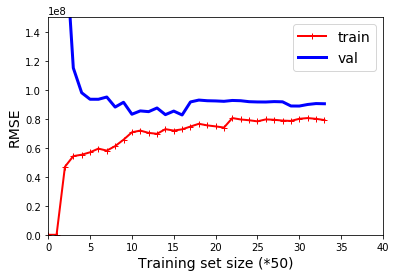

In [596]:
plot_learning_curves(lin_reg, X_train_prep.values, y_train)
plt.axis([0, 40, 0, 150000000])                         # not shown in the book
plt.show()                                      # not shown

Clear Linear regression seems to underfit the data

# Random Forest

In [597]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train_prep, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [598]:
reve_pred=forest_reg.predict(X_test_prep)
rfr_mse = mean_squared_error(reve_pred,y_test)
rfr_rmse=np.sqrt(rfr_mse)
rfr_rmse

78374932.38582309

In [599]:
rfr_rmse/y_test.mean()

1.1480373281618403

In [600]:
forest_reg.score(X_test_prep, y_test)

0.6123095211553107

In [601]:
forest_reg.score(X_train_prep, y_train)

0.9386916564663298

In [602]:
from sklearn.model_selection import GridSearchCV

In [604]:
param_grid = [
    {'n_estimators':[30,90,200], "max_features":[2,4,6],"min_samples_leaf":[3,9,50], "max_depth":[3,9,20]}
    
]

In [605]:
forest_reg=RandomForestRegressor (random_state=10)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 90, 200], 'max_features': [2, 4, 6], 'min_samples_leaf': [3, 9, 50], 'max_depth': [3, 9, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [606]:
grid_search.best_params_

{'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 3, 'n_estimators': 200}

In [607]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(round(np.sqrt(-mean_score)/1000000), params)

105.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 30}
112.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 90}
109.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 200}
106.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 30}
112.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 90}
110.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 9, 'n_estimators': 200}
115.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 50, 'n_estimators': 30}
120.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 50, 'n_estimators': 90}
118.0 {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 50, 'n_estimators': 200}
95.0 {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 30}
96.0 {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 90}
97.0 {'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 

In [608]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances;
attributes = X_train_prep.columns
sorted(zip(feature_importances, attributes), reverse=True)

array([1.27038778e-01, 5.03699091e-02, 2.34353383e-02, 4.85023095e-03,
       1.47972976e-02, 4.43222044e-03, 1.80398349e-03, 8.52585541e-04,
       2.41463918e-04, 6.10262336e-03, 4.01464083e-03, 3.72022454e-03,
       2.93720826e-06, 5.10811830e-04, 6.29085971e-04, 3.94405826e-05,
       4.34173408e-04, 6.47630495e-04, 4.22262678e-03, 1.43123414e-03,
       1.87976906e-04, 1.72405130e-05, 6.42309035e-04, 1.73159289e-03,
       2.33121971e-04, 4.00077089e-04, 1.41774278e-04, 9.53550683e-05,
       1.83982197e-04, 7.61778928e-04, 9.57386306e-04, 2.76864946e-03,
       2.63735464e-03, 8.21778521e-07, 5.11079853e-05, 1.84263128e-05,
       4.90802099e-04, 9.22187493e-05, 1.07898516e-03, 2.32305650e-03,
       2.75376820e-04, 7.17656734e-04, 9.93959286e-04, 1.19621049e-03,
       1.23481808e-02, 5.42978789e-02, 1.43285359e-04, 4.50803351e-04,
       3.59432797e-04, 2.64985253e-03, 1.60374383e-03, 2.96807589e-03,
       8.49656861e-04, 4.55053085e-04, 4.00972792e-04, 2.87290772e-04,
      

[(0.12703877839612707, 'budget'),
 (0.12618617359958512, 'budget year'),
 (0.12199294137037218, 'budget popularity'),
 (0.11579093257020161, 'budget^2'),
 (0.07177689265090154, 'popularity year'),
 (0.06396277667118255, 'budget runtime'),
 (0.06285280942174634, 'popularity^2'),
 (0.05429787892859392, 'year_budget_ratio'),
 (0.05036990908031863, 'popularity'),
 (0.03651606173777503, 'runtime popularity'),
 (0.02343533827856835, 'runtime'),
 (0.01812837069799216, 'runtime year'),
 (0.014846677673104729, 'runtime^2'),
 (0.014797297607569307, 'Adventure'),
 (0.012348180802080326, 'year'),
 (0.011920657745160738, 'year'),
 (0.010441681757855432, 'year^2'),
 (0.006102623362995368, 'Drama'),
 (0.0048502309530850315, 'Action'),
 (0.004432220443139224, 'Animation'),
 (0.004222626778836532, 'Science Fiction'),
 (0.004014640834747198, 'Family'),
 (0.0037202245404571554, 'Fantasy'),
 (0.002968075887103304, 'Jun'),
 (0.0027686494623984435, 'prod_country_United States of America'),
 (0.0026498525306

In [609]:
final_model = grid_search.best_estimator_

In [610]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=10,
           verbose=0, warm_start=False)

In [611]:
reve_pred_fin=final_model.predict(X_test_prep)
fin_mse = mean_squared_error(reve_pred_fin, y_test)
fin_rmse=np.sqrt(fin_mse)
fin_rmse

69883479.43566576

In [612]:
fin_rmse/y_test.mean()

1.0236543824883335

In [613]:
final_pred=pd.Series(final_model.predict(X_test_prep))

In [614]:
final_model.score(X_test_prep, y_test)

0.6917665146699972

[0, 40, 0, 150000000]

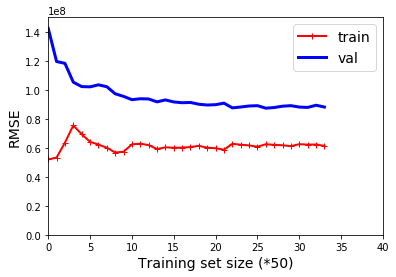

In [615]:
plot_learning_curves(final_model, X_train_prep.values, y_train)
plt.axis([0, 40, 0, 150000000])                         # not shown in the book
plt.show()             

While RandomForestsRegressor significantly overfits

# Lgb

In [616]:
import lightgbm as lgb
random_seed=42

In [617]:
lgbmodel = lgb.LGBMRegressor(n_estimators=10000, 
                             objective='regression', 
                             metric='rmse',
                             max_depth = 5,
                             num_leaves=5, 
                             min_child_samples=100,
                             learning_rate=0.001,
                             boosting = 'gbdt',
                             min_data_in_leaf= 10,
                             feature_fraction = 0.2,
                             bagging_freq = 1,
                             bagging_fraction = 0.9,
                             importance_type='gain',
                             lambda_l1 = 0.2,
                             bagging_seed=random_seed, 
                             subsample=.8, 
                             colsample_bytree=.9,
                             use_best_model=True)

In [618]:
lgbmodel.fit(X_train_prep, y_train)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=42,
       boosting='gbdt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.9, feature_fraction=0.2, importance_type='gain',
       lambda_l1=0.2, learning_rate=0.001, max_depth=5, metric='rmse',
       min_child_samples=100, min_child_weight=0.001, min_data_in_leaf=10,
       min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=5,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=0.8,
       subsample_for_bin=200000, subsample_freq=0, use_best_model=True)

In [619]:
lgbmodel.score(X_test_prep, y_test)

0.6764286603584075

In [620]:
reve_pred=lgbmodel.predict(X_test_prep)
rfr_mse = mean_squared_error(reve_pred, y_test)
rfr_rmse=np.sqrt(rfr_mse)
rfr_rmse

71601090.19945657

In [621]:
rfr_rmse/y_test.mean()

1.048813973853303

[0, 40, 0, 150000000]

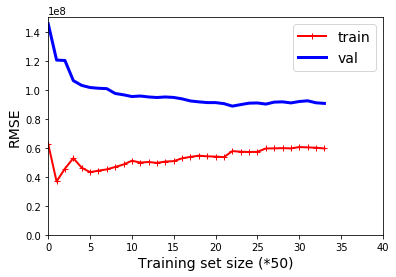

In [622]:
plot_learning_curves(lgbmodel, X_train_prep.values, y_train)
plt.axis([0, 40, 0, 150000000])                         # not shown in the book
plt.show()    

# Gradient Boosting

In [623]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=300, learning_rate=1.0, random_state=42)


In [624]:
gbrt.fit(X_train_prep, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [625]:
param_grid = [
    {'n_estimators':[30,90,300], "max_features":[2,4,8],"min_samples_leaf":[3,9,27], "max_depth":[3,9,15,20]},
 
]

In [626]:
gbrt=GradientBoostingRegressor(random_state=10)

grid_search = GridSearchCV(gbrt, param_grid, cv=5,
                          scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=10, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [30, 90, 300], 'max_features': [2, 4, 8], 'min_samples_leaf': [3, 9, 27], 'max_depth': [3, 9, 15, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [627]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 2,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [628]:
gbrt = grid_search.best_estimator_

In [629]:
reve_pred=gbrt.predict(X_test_prep)
rfr_mse = mean_squared_error(reve_pred, y_test)
rfr_rmse=np.sqrt(rfr_mse)
rfr_rmse

69139419.97804192

In [630]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances;
attributes = X_train_prep.columns;
sorted(zip(feature_importances, attributes), reverse=True)

array([0.06287809, 0.10000827, 0.02314473, 0.00598532, 0.01096433,
       0.00543356, 0.00348695, 0.00323989, 0.00122966, 0.00790685,
       0.00772733, 0.00579633, 0.00052981, 0.00141571, 0.00252153,
       0.00064761, 0.00160305, 0.00148688, 0.00392944, 0.00166762,
       0.00021184, 0.00033313, 0.00094291, 0.00638648, 0.00079329,
       0.0012962 , 0.00054971, 0.00057754, 0.00174821, 0.00090974,
       0.00183107, 0.00681177, 0.00149083, 0.00035129, 0.00015832,
       0.00014589, 0.00115223, 0.00037505, 0.004482  , 0.00197864,
       0.00079789, 0.00097936, 0.00237298, 0.00502062, 0.01404682,
       0.08518176, 0.00092415, 0.00092572, 0.00087377, 0.00533856,
       0.00233454, 0.00470224, 0.00084967, 0.00181457, 0.00081615,
       0.00097259, 0.00081432, 0.00206701, 0.01559701, 0.11617332,
       0.0528628 , 0.05564316, 0.0826168 , 0.02242908, 0.03541614,
       0.02455406, 0.05129597, 0.11107459, 0.01737526])

[(0.11617332220565856, 'budget^2'),
 (0.1110745914843513, 'popularity year'),
 (0.1000082698794272, 'popularity'),
 (0.08518175652821061, 'year_budget_ratio'),
 (0.08261679722261903, 'budget year'),
 (0.06287809497563582, 'budget'),
 (0.05564316032901734, 'budget popularity'),
 (0.05286280342329881, 'budget runtime'),
 (0.05129596569138289, 'popularity^2'),
 (0.035416143944802185, 'runtime popularity'),
 (0.02455406125688324, 'runtime year'),
 (0.023144725371809283, 'runtime'),
 (0.022429081944640026, 'runtime^2'),
 (0.01737525976902512, 'year^2'),
 (0.015597007280436028, 'year'),
 (0.014046821813789636, 'year'),
 (0.01096433446705304, 'Adventure'),
 (0.00790684933024569, 'Drama'),
 (0.0077273283672745835, 'Family'),
 (0.006811774781332532, 'prod_country_United States of America'),
 (0.006386478994286689, 'spoken_lan_English'),
 (0.005985316325624907, 'Action'),
 (0.005796326480458694, 'Fantasy'),
 (0.005433555888205483, 'Animation'),
 (0.0053385606335283635, 'Apr'),
 (0.00502061646524

In [631]:
gbrt.score(X_test_prep, y_test)

0.6982951853162602

[0, 40, 0, 150000000]

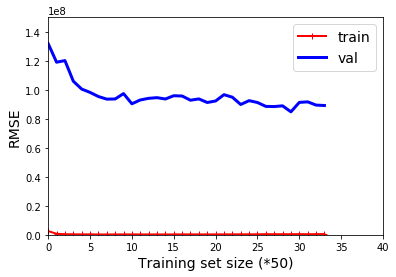

In [632]:
plot_learning_curves(gbrt, X_train_prep.values, y_train)
plt.axis([0, 40, 0, 150000000])                         # not shown in the book
plt.show() 

# AdaBoostRegressor

In [635]:
from sklearn.ensemble import AdaBoostRegressor

In [636]:
ada_reg=AdaBoostRegressor()

In [637]:
param_grid = [
    {'n_estimators':[10,30,90,300], "learning_rate":[0.03,0.1,0.5],"loss":["linear","square","exponential"]},
 
]

In [638]:
ada_reg=AdaBoostRegressor(random_state=10)

grid_search = GridSearchCV(ada_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=10),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 30, 90, 300], 'learning_rate': [0.03, 0.1, 0.5], 'loss': ['linear', 'square', 'exponential']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [639]:
grid_search.best_params_

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 10}

In [640]:
ada_reg = grid_search.best_estimator_

In [641]:
reve_pred=ada_reg.predict(X_test_prep)
rfr_mse = mean_squared_error(reve_pred, y_test)
rfr_rmse=np.sqrt(rfr_mse)
rfr_rmse

77881290.70001625

In [642]:
ada_reg.score(X_test_prep, y_test)

0.6171778502282441

[0, 40, 0, 150000000]

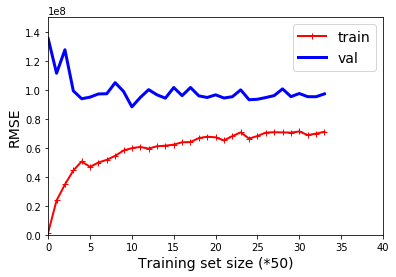

In [643]:
plot_learning_curves(ada_reg, X_train_prep.values, y_train)
plt.axis([0, 40, 0, 150000000])                         # not shown in the book
plt.show() 